   # Global Power Plant Database
   
## Problem Statement:

### Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

### Importing Libraries :

In [1]:
import numpy as np 
import pandas as pd 

import warnings
warnings.filterwarnings('ignore')

## loading dataset

In [2]:
pd.set_option("display.max_columns", None)
data=pd.read_csv('global_power_plant.csv')
data.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,NaN,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


In [3]:
data.shape

(908, 25)

we have 908 rows and 25 columns

In [4]:
data.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

Datatype is object and float46 

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

In [6]:
data.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

Few columns have null values.

In [7]:
data.nunique()

country                       1
country_long                  1
name                        908
gppd_idnr                   908
capacity_mw                 365
latitude                    837
longitude                   828
primary_fuel                  8
other_fuel1                   3
other_fuel2                   1
other_fuel3                   0
commissioning_year           73
owner                       280
source                      191
url                         304
geolocation_source            3
wepp_id                       0
year_of_capacity_data         1
generation_gwh_2013         364
generation_gwh_2014         374
generation_gwh_2015         398
generation_gwh_2016         405
generation_gwh_2017         410
generation_data_source        1
estimated_generation_gwh      0
dtype: int64

In [8]:
data=data.drop('name',axis=1)
data=data.drop('gppd_idnr',axis=1)
data=data.drop('other_fuel2',axis=1)
data=data.drop('other_fuel3',axis=1)
data=data.drop('wepp_id',axis=1)
data=data.drop('estimated_generation_gwh',axis=1)
data=data.drop('owner',axis=1)
data=data.drop('year_of_capacity_data',axis=1)
data=data.drop('generation_data_source',axis=1)
data=data.drop('country',axis=1)
data=data.drop('country_long',axis=1)

on the basis of null values and unique values we drop unnecessary columns

In [9]:
data.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel', 'other_fuel1',
       'commissioning_year', 'source', 'url', 'geolocation_source',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017'],
      dtype='object')

In [10]:
data['source'].value_counts()

Central Electricity Authority                520
CDM                                          124
Lancosola                                     10
National Renewable Energy Laboratory           8
National Thermal Power Corporation (NTPC)      6
                                            ... 
Sunflag Co ltd                                 1
Real Estate e                                  1
Rattanindia Power ltd                          1
Core Fuels ltd                                 1
Sahakar Shiromani vasantrao                    1
Name: source, Length: 191, dtype: int64

In [12]:
data['commissioning_year'].value_counts()

2013.0    28
2015.0    26
2012.0    23
2016.0    21
2014.0    17
          ..
1958.0     1
1949.0     1
1954.0     1
1956.0     1
1927.0     1
Name: commissioning_year, Length: 73, dtype: int64

By observing the data, I decided to drop few columns like url,source and commissioning year

In [13]:
data=data.drop('url',axis=1)
data=data.drop('source',axis=1)
data=data.drop('commissioning_year',axis=1)

In [14]:
data['primary_fuel'].value_counts()

Coal       259
Hydro      250
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         21
Nuclear      9
Name: primary_fuel, dtype: int64

In [15]:
data['other_fuel1'].value_counts()

Oil             196
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64

In [16]:
data

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,2.5,28.1839,73.2407,Solar,NaN,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,NaN,WRI,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,WRI,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,NaN,WRI,631.777928,617.789264,843.747000,886.004428,663.774500
4,1800.0,21.9603,82.4091,Coal,Oil,WRI,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736
...,...,...,...,...,...,...,...,...,...,...,...
903,1600.0,16.2949,77.3568,Coal,Oil,WRI,NaN,NaN,0.994875,233.596650,865.400000
904,3.0,12.8932,78.1654,Solar,NaN,Industry About,NaN,NaN,NaN,NaN,NaN
905,25.5,15.2758,75.5811,Wind,NaN,WRI,NaN,NaN,NaN,NaN,NaN
906,80.0,24.3500,73.7477,Coal,NaN,WRI,NaN,NaN,NaN,NaN,NaN


### filling nan values in other_fuel1:-

In [17]:
data.other_fuel1.fillna(data.primary_fuel, inplace=True)

In [18]:
data

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,2.5,28.1839,73.2407,Solar,Solar,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,Coal,WRI,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,Wind,WRI,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,Gas,WRI,631.777928,617.789264,843.747000,886.004428,663.774500
4,1800.0,21.9603,82.4091,Coal,Oil,WRI,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736
...,...,...,...,...,...,...,...,...,...,...,...
903,1600.0,16.2949,77.3568,Coal,Oil,WRI,NaN,NaN,0.994875,233.596650,865.400000
904,3.0,12.8932,78.1654,Solar,Solar,Industry About,NaN,NaN,NaN,NaN,NaN
905,25.5,15.2758,75.5811,Wind,Wind,WRI,NaN,NaN,NaN,NaN,NaN
906,80.0,24.3500,73.7477,Coal,Coal,WRI,NaN,NaN,NaN,NaN,NaN


Dropping nan values

In [19]:
data.dropna(axis=0,inplace=True)
data.reset_index(drop=True)

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,135.0,23.8712,91.3602,Gas,Gas,WRI,631.777928,617.789264,843.74700,886.004428,663.774500
1,1800.0,21.9603,82.4091,Coal,Oil,WRI,1668.290000,3035.550000,5916.37000,6243.000000,5385.579736
2,250.0,23.7689,68.6447,Coal,Oil,WRI,821.798000,1153.421000,1208.85200,1175.765000,1147.913000
3,60.0,10.4547,77.0078,Hydro,Hydro,WRI,147.568450,157.558250,152.19520,61.421350,89.629600
4,192.0,32.2258,77.2070,Hydro,Hydro,WRI,696.738800,674.391100,721.33520,675.724400,679.594950
...,...,...,...,...,...,...,...,...,...,...,...
367,400.0,30.5669,79.5468,Hydro,Hydro,WRI,435.710500,1806.860300,1204.59675,2031.839750,2150.095500
368,1470.0,22.8725,73.3588,Coal,Oil,WRI,4542.028000,6753.870000,5161.53800,3539.630000,7018.217000
369,540.0,20.2727,78.9792,Coal,Oil,WRI,2311.320000,1045.820000,1651.15890,1229.480000,999.170000
370,62.4,30.3033,77.5684,Hydro,Hydro,WRI,203.975000,184.453100,183.00000,204.253600,175.866250


dropped nan values from 2013 to 2017 in generation gwh

In [20]:
data.drop('geolocation_source',axis=1,inplace=True)

In [21]:
data.head()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
3,135.0,23.8712,91.3602,Gas,Gas,631.777928,617.789264,843.7470,886.004428,663.774500
4,1800.0,21.9603,82.4091,Coal,Oil,1668.290000,3035.550000,5916.3700,6243.000000,5385.579736
5,250.0,23.7689,68.6447,Coal,Oil,821.798000,1153.421000,1208.8520,1175.765000,1147.913000
6,60.0,10.4547,77.0078,Hydro,Hydro,147.568450,157.558250,152.1952,61.421350,89.629600
7,192.0,32.2258,77.2070,Hydro,Hydro,696.738800,674.391100,721.3352,675.724400,679.594950


## Visualization

In [22]:
!pip install plotly

In [23]:
# use to help in data visualization
import matplotlib.pyplot as plt
import seaborn as sns

import plotly
import plotly.express as px
import plotly.graph_objs as go

<Figure size 288x288 with 0 Axes>

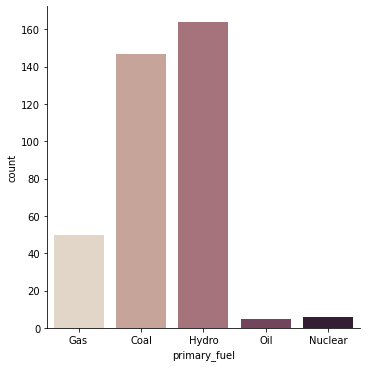

In [24]:
fig = plt.figure(figsize =(4, 4))
sns.catplot(x="primary_fuel", kind="count", palette="ch:.25", data=data)
plt.show()

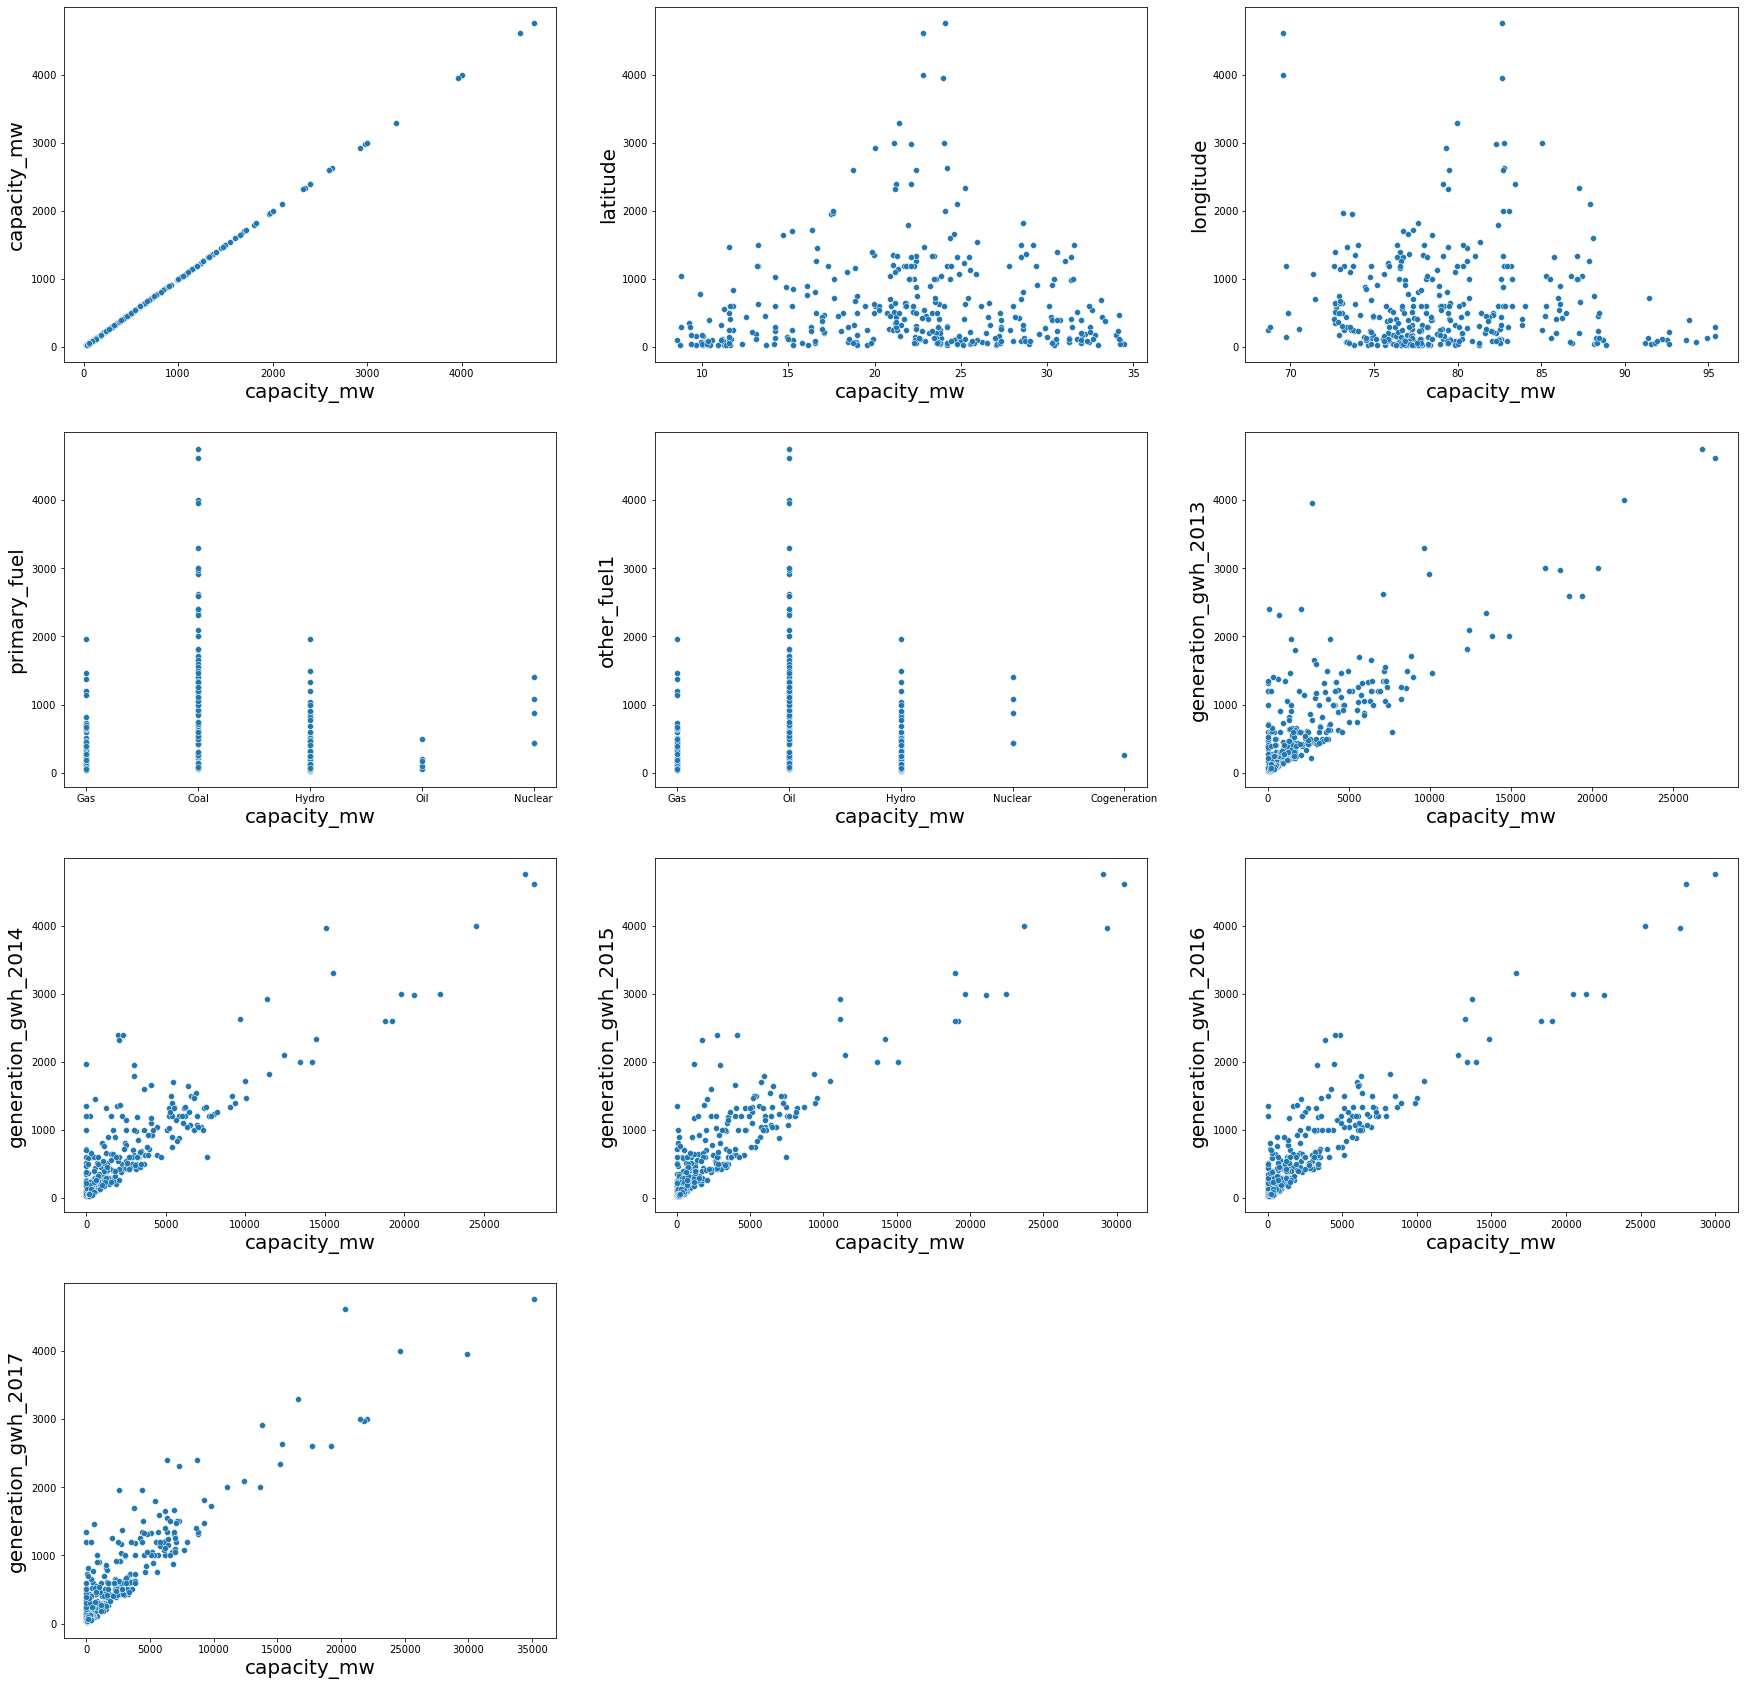

In [25]:
plt.figure(figsize=[30,30])

count=1
for i in data.columns:
    plt.subplot(4,3,count)
    sns.scatterplot(data[i],data["capacity_mw"])
    plt.xlabel('capacity_mw',fontsize=20)
    plt.ylabel(i,fontsize=20)
    count+=1
plt.show()

###### Encoding primary_fuel and other_fuel1

In [26]:
data.replace({"primary_fuel":{'Hydro':0,'Oil':1,'Gas':2,'Nuclear':3,'Coal':4}},inplace=True)
data.replace({"other_fuel1":{'Hydro':0,'Oil':1,'Gas':2,'Nuclear':3,'Cogeneration':4}},inplace=True)

In [27]:
data.head()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
3,135.0,23.8712,91.3602,2,2,631.777928,617.789264,843.7470,886.004428,663.774500
4,1800.0,21.9603,82.4091,4,1,1668.290000,3035.550000,5916.3700,6243.000000,5385.579736
5,250.0,23.7689,68.6447,4,1,821.798000,1153.421000,1208.8520,1175.765000,1147.913000
6,60.0,10.4547,77.0078,0,0,147.568450,157.558250,152.1952,61.421350,89.629600
7,192.0,32.2258,77.2070,0,0,696.738800,674.391100,721.3352,675.724400,679.594950


###### heatmap corr

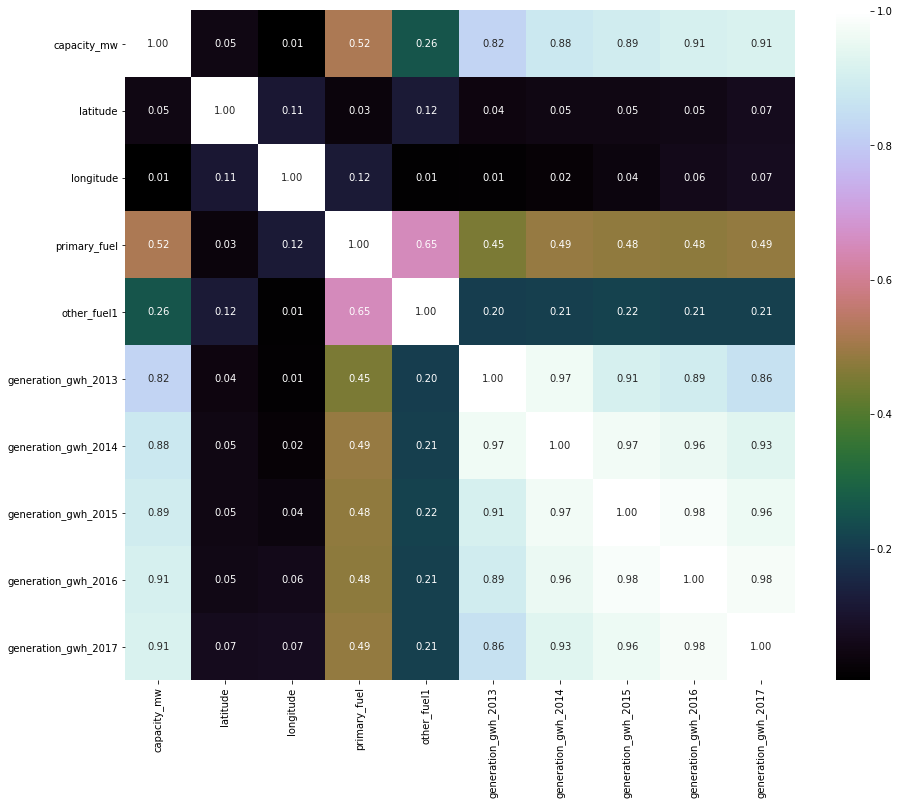

In [28]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr().abs(),square=True,fmt='.2f',cbar=True,cbar_kws={'shrink':.82},annot=True,annot_kws={'size':10},cmap='cubehelix')
plt.show()

### visualization of outliers and removing outliers

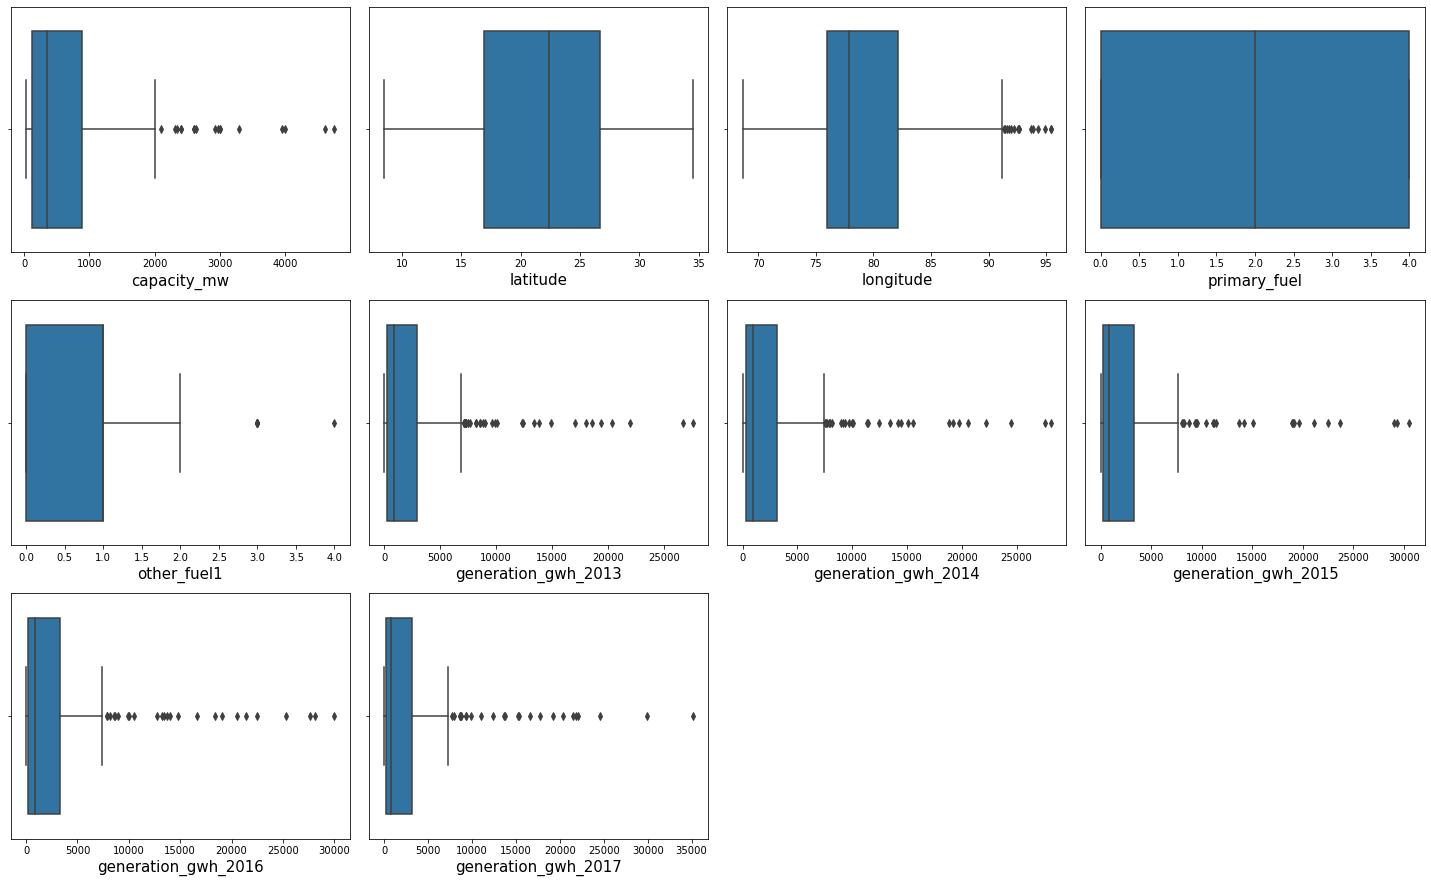

In [29]:
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1
for i in data:
    if plotnumber<=20:
        ax=plt.subplot(5,4,plotnumber)
        sns.boxplot(data[i])
        plt.xlabel(i,fontsize=15)
    plotnumber+=1
plt.tight_layout()
plt.show()

In [30]:
# importing zscore for outliers
from scipy.stats import zscore

def threshold():
    for i in np.arange(3,5,0.2):
        pp=data.copy()
        pp=pp[(z<i).all(axis=1)]
        loss=(data.shape[0]-pp.shape[0])/data.shape[0]*100
        print('With threshold {} data loss is {}%'.format(np.round(i,1),np.round(loss,2))) 

        
z=np.abs(zscore(data))
print(threshold())

With threshold 3.0 data loss is 5.91%
With threshold 3.2 data loss is 3.23%
With threshold 3.4 data loss is 2.96%
With threshold 3.6 data loss is 2.96%
With threshold 3.8 data loss is 2.69%
With threshold 4.0 data loss is 2.69%
With threshold 4.2 data loss is 2.69%
With threshold 4.4 data loss is 1.88%
With threshold 4.6 data loss is 1.34%
With threshold 4.8 data loss is 1.08%
None


at 4.8 threshold we are lossing 1.08% data. we can not loose more data

In [31]:
data=data[(z<4.2).all(axis=1)]

In [32]:
### visualization of skewness and removing outliers

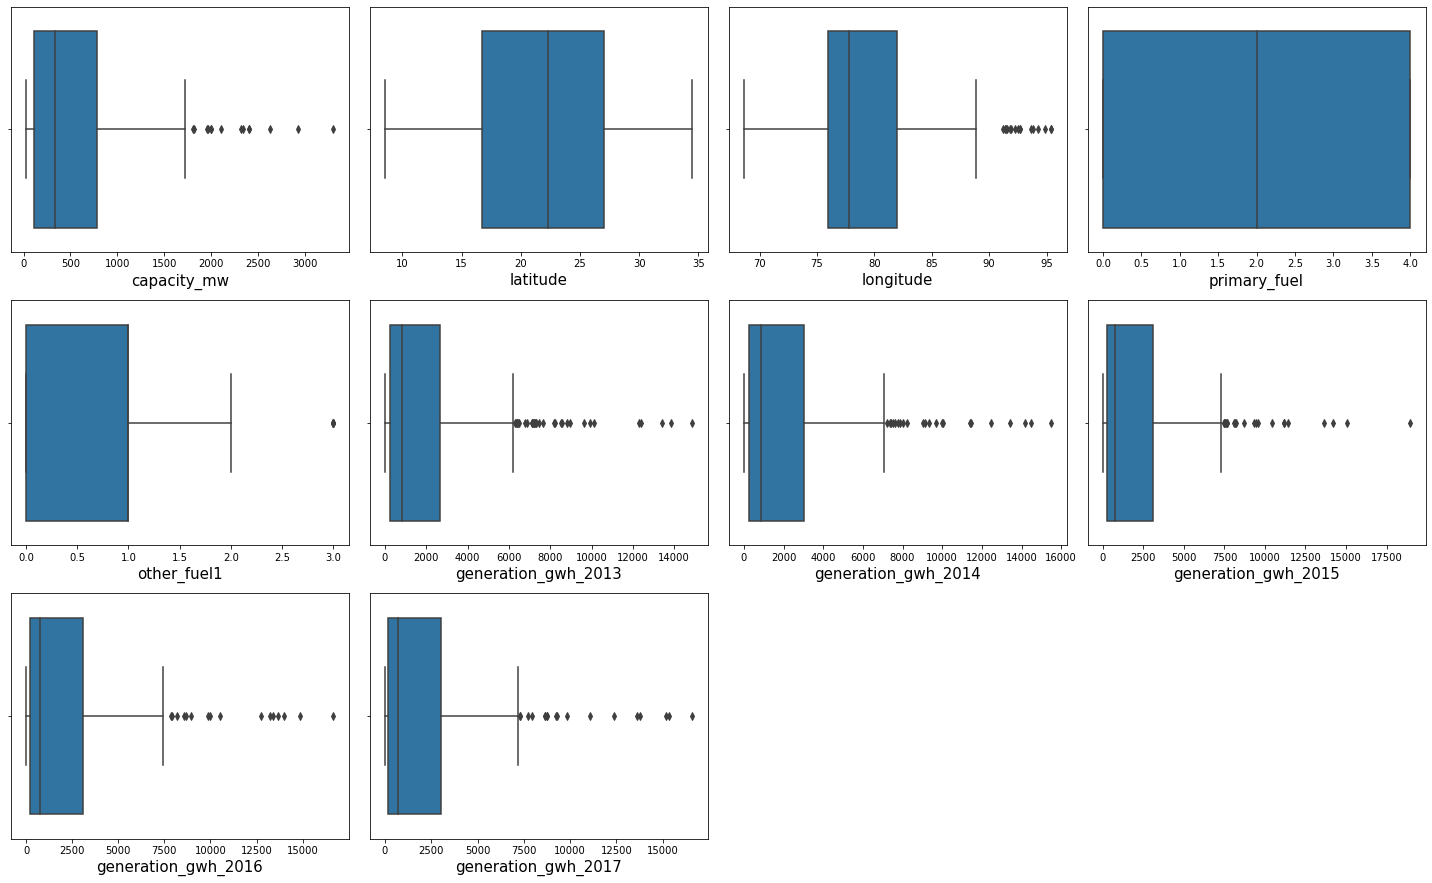

In [33]:
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1
for i in data:
    if plotnumber<=20:
        ax=plt.subplot(5,4,plotnumber)
        sns.boxplot(data[i])
        plt.xlabel(i,fontsize=15)
    plotnumber+=1
plt.tight_layout()
plt.show()

In [34]:
data.skew()

capacity_mw            1.612677
latitude              -0.185752
longitude              0.959009
primary_fuel           0.144108
other_fuel1            0.787707
generation_gwh_2013    2.082908
generation_gwh_2014    2.045193
generation_gwh_2015    2.211858
generation_gwh_2016    2.184080
generation_gwh_2017    2.081603
dtype: float64

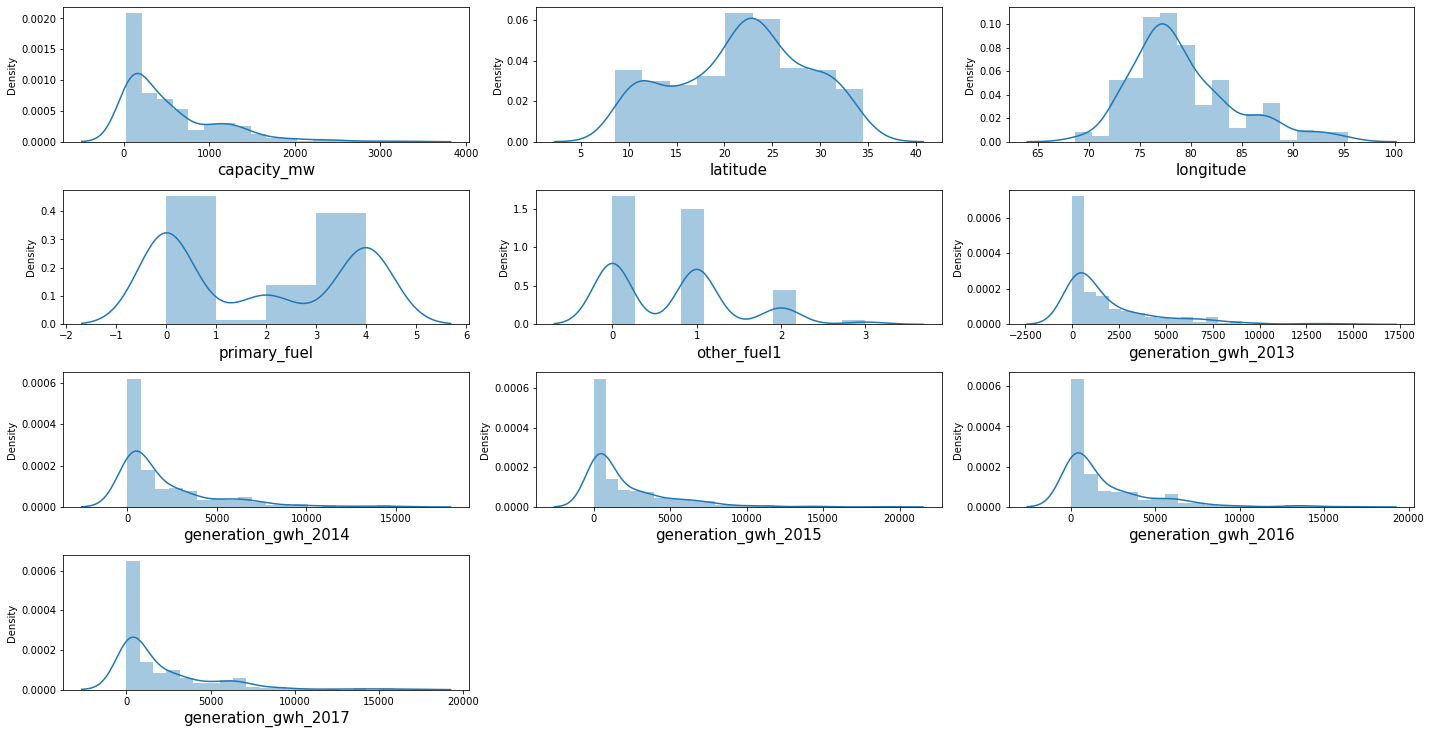

In [35]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for i in data:
    if plotnumber<=30:
        ax=plt.subplot(10,3,plotnumber)
        sns.distplot(data[i])
        plt.xlabel(i,fontsize=15)
    plotnumber+=1
plt.tight_layout()
plt.show()

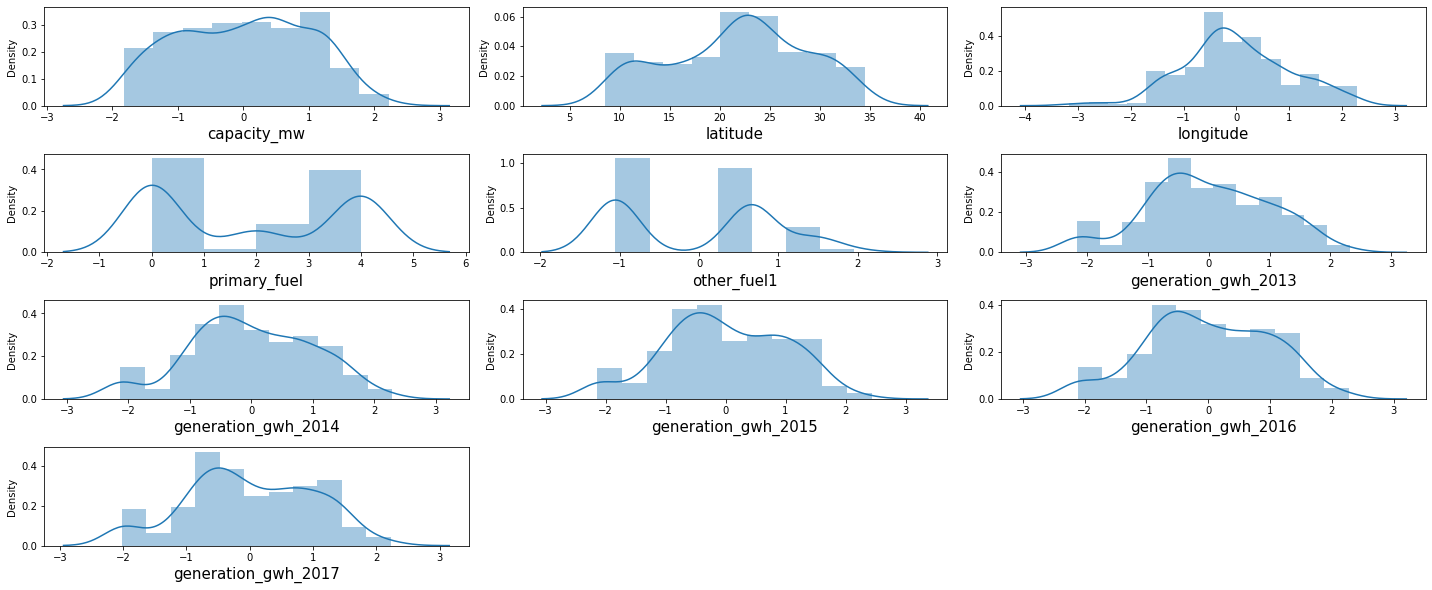

In [36]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()

for i in data:
    if np.abs(data[i].skew())>0.5:
        data[i]=pt.fit_transform(data[i].values.reshape(-1,1))

plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1
for i in data:
    if plotnumber<=30:
        ax=plt.subplot(10,3,plotnumber)
        sns.distplot(data[i])
        plt.xlabel(i,fontsize=15)
    plotnumber+=1
plt.tight_layout()
plt.show()

In [37]:
data.shape

(362, 10)

In [38]:
x=data.drop(['capacity_mw','primary_fuel'],axis=1)
y_mw=data['capacity_mw']
y_fuel=data['primary_fuel']

In [39]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

x_scale=scaler.fit_transform(x)
x=pd.DataFrame(x_scale,columns=x.columns)
x

,latitude,longitude,other_fuel1,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,0.590919,0.936044,0.834651,0.437585,0.424417,0.457673,0.485301,0.444622
1,0.517305,0.723739,0.567538,0.572109,0.658541,0.755990,0.793785,0.763791
2,0.586978,0.000000,0.567538,0.471301,0.506626,0.504210,0.522985,0.515573
3,0.074072,0.520617,0.000000,0.281955,0.279546,0.277603,0.217363,0.243274
4,0.912764,0.529532,0.000000,0.449912,0.435290,0.438434,0.451142,0.447514
...,...,...,...,...,...,...,...,...
357,0.848858,0.625457,0.000000,0.393071,0.573098,0.503737,0.602091,0.607124
358,0.552445,0.332599,0.567538,0.743433,0.810837,0.731006,0.691587,0.814623
359,0.452293,0.603595,0.567538,0.623909,0.492974,0.547428,0.529129,0.496848
360,0.838703,0.545389,0.000000,0.312492,0.294103,0.294067,0.320467,0.302052


In [44]:
!pip install numpy scipy scikit-learn
!pip install scikit-plot

In [45]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
import scikitplot as skplot
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve,plot_roc_curve
from sklearn.model_selection import train_test_split, cross_val_score

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [47]:
max_mw=0
lr=LinearRegression()
for i in range(1,201):
    x_train,x_test,y_train,y_test=train_test_split(x,y_mw,test_size=0.25,random_state=i)
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    r2 = r2_score(y_test, pred)
    if r2>max_mw:
        max_mw=r2
        random_state_mw=i
print('\nmax random state for capacity mw:',random_state_mw)


max_fuel=0
model=LogisticRegression()
for i in range(1,201):
    train_x,test_x,train_y,test_y=train_test_split(x,y_fuel,test_size=0.25,random_state=i)
    model.fit(train_x,train_y)
    pred_=model.predict(test_x)
    accu=accuracy_score(test_y,pred_)
    if accu>max_fuel:
        max_fuel=accu
        random_state_fuel=i
print('\nmax random state for fuel type:',random_state_fuel)


max random state for capacity mw: 92

max random state for fuel type: 9


In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y_mw,test_size=0.25,random_state=random_state_mw)
train_x,test_x,train_y,test_y=train_test_split(x,y_fuel,test_size=0.25,random_state=random_state_fuel)

-------Linear Regression for capacity MW----------
r2 score:83.54
cross validation score:64.95%
error:0.18079487322861162


-------LogisticRegression for Fuel Type------------
accuracy score:97.80%
cross validation score:88.68%

classification report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           2       0.78      1.00      0.88         7
           3       0.00      0.00      0.00         1
           4       1.00      0.97      0.99        34

    accuracy                           0.98        91
   macro avg       0.69      0.74      0.72        91
weighted avg       0.97      0.98      0.97        91


confusion report:

AxesSubplot(0.125,0.125;0.62x0.755)


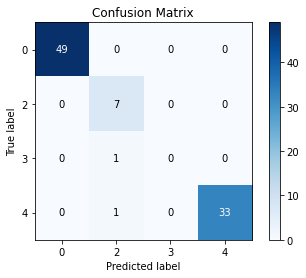

In [49]:
# Linear Regression
lr=LinearRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
r2=r2_score(y_test, pred)
error=mean_squared_error(y_test,pred)
scr=cross_val_score(lr,x,y_mw,cv=10)
print("-------Linear Regression for capacity MW----------")
print(f"r2 score:{r2*100:.2f}")
print(f'cross validation score:{scr.mean()*100:.2f}%')
print(f'error:{error}')

# LogisticRegression model
model=LogisticRegression()
model.fit(train_x,train_y)
pred_=model.predict(test_x)
accu=accuracy_score(test_y,pred_)
scr_=cross_val_score(model,x,y_fuel,cv=10)
print("\n\n-------LogisticRegression for Fuel Type------------")
print(f'accuracy score:{accuracy_score(test_y,pred_)*100:.2f}%')
print(f'cross validation score:{scr_.mean()*100:.2f}%')
print(f'\nclassification report:\n\n{classification_report(test_y,pred_)}')
print(f'\nconfusion report:\n\n{skplot.metrics.plot_confusion_matrix(test_y,pred_)}')
plt.show()

-------DecisionTreeRegressor for capacity MW----------
r2 score:59.13
cross validation score:67.52%
error:0.4489682766853335


-------decisiontree classifier for Fuel Type------------

accuracy score:96.70%

cross validation score:93.66%


classification report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       0.00      0.00      0.00         0
           2       1.00      0.71      0.83         7
           3       1.00      1.00      1.00         1
           4       1.00      0.97      0.99        34

    accuracy                           0.97        91
   macro avg       0.80      0.74      0.76        91
weighted avg       1.00      0.97      0.98        91



confusion report:

AxesSubplot(0.125,0.125;0.62x0.755)


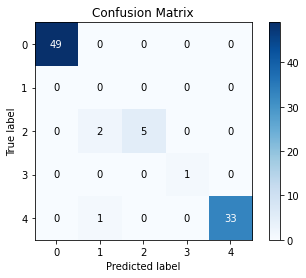

In [50]:
# DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred=dtr.predict(x_test)
r2=r2_score(y_test, pred)
error=mean_squared_error(y_test,pred)
scr=cross_val_score(dtr,x,y_mw,cv=10)
print("-------DecisionTreeRegressor for capacity MW----------")
print(f"r2 score:{r2*100:.2f}")
print(f'cross validation score:{scr.mean()*100:.2f}%')
print(f'error:{error}')

# decisiontree classifier model  
dtc=DecisionTreeClassifier()
dtc.fit(train_x,train_y)
pred_=dtc.predict(test_x)
accu=accuracy_score(test_y,pred_)
scr_=cross_val_score(dtc,x,y_fuel,cv=10)
print("\n\n-------decisiontree classifier for Fuel Type------------")
print(f'\naccuracy score:{accuracy_score(test_y,pred_)*100:.2f}%\n')
print(f'cross validation score:{scr_.mean()*100:.2f}%\n')
print(f'\nclassification report:\n\n{classification_report(test_y,pred_)}\n')
print(f'\nconfusion report:\n\n{skplot.metrics.plot_confusion_matrix(test_y,pred_)}')
plt.show()

-------KNeighborsRegressor for capacity MW----------
r2 score:82.97
cross validation score:81.36%

error:0.1870367672290383


-------KNeighbors Classifier for Fuel Type------------

accuracy score:93.41%

cross validation score:93.37%


classification report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           2       0.57      0.57      0.57         7
           3       0.00      0.00      0.00         1
           4       0.91      0.94      0.93        34

    accuracy                           0.93        91
   macro avg       0.62      0.63      0.62        91
weighted avg       0.92      0.93      0.93        91



confusion report:

AxesSubplot(0.125,0.125;0.62x0.755)


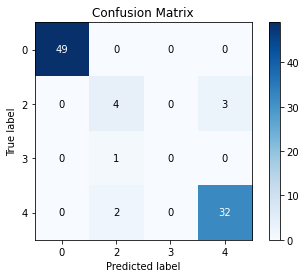

In [51]:
# KNeighborsRegressor
knnr=KNeighborsRegressor()
knnr.fit(x_train,y_train)
pred=knnr.predict(x_test)
r2=r2_score(y_test, pred)
error=mean_squared_error(y_test,pred)
scr=cross_val_score(knnr,x,y_mw,cv=10)
print("-------KNeighborsRegressor for capacity MW----------")
print(f"r2 score:{r2*100:.2f}")
print(f'cross validation score:{scr.mean()*100:.2f}%\n')
print(f'error:{error}')

# KNeighbors Classifier model
knc=KNeighborsClassifier()
knc.fit(train_x,train_y)
pred_=knc.predict(test_x)
accu=accuracy_score(test_y,pred_)
scr_=cross_val_score(knc,x,y_fuel,cv=10)
print("\n\n-------KNeighbors Classifier for Fuel Type------------")
print(f'\naccuracy score:{accuracy_score(test_y,pred_)*100:.2f}%\n')
print(f'cross validation score:{scr_.mean()*100:.2f}%\n')
print(f'\nclassification report:\n\n{classification_report(test_y,pred_)}\n')
print(f'\nconfusion report:\n\n{skplot.metrics.plot_confusion_matrix(test_y,pred_)}')
plt.show()

-------Support Vector Regression for capacity MW----------
r2 score:88.27
cross validation score:85.89%

error:0.12884990299401225


-------Support Vector Classifier for Fuel Type------------

accuracy score:96.70%

cross validation score:95.04%


classification report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           2       0.75      0.86      0.80         7
           3       0.00      0.00      0.00         1
           4       0.97      0.97      0.97        34

    accuracy                           0.97        91
   macro avg       0.68      0.71      0.69        91
weighted avg       0.96      0.97      0.96        91



confusion report:

AxesSubplot(0.125,0.125;0.62x0.755)


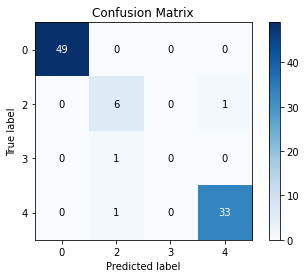

In [52]:
# SVR
svr=SVR()
svr.fit(x_train,y_train)
pred=svr.predict(x_test)
r2=r2_score(y_test, pred)
error=mean_squared_error(y_test,pred)
scr=cross_val_score(svr,x,y_mw,cv=10)
print("-------Support Vector Regression for capacity MW----------")
print(f"r2 score:{r2*100:.2f}")
print(f'cross validation score:{scr.mean()*100:.2f}%\n')
print(f'error:{error}')

# Support Vector Classifier model
svc=SVC()
svc.fit(train_x,train_y)
pred_=svc.predict(test_x)
accu=accuracy_score(test_y,pred_)
scr_=cross_val_score(svc,x,y_fuel,cv=10)
print("\n\n-------Support Vector Classifier for Fuel Type------------")
print(f'\naccuracy score:{accuracy_score(test_y,pred_)*100:.2f}%\n')
print(f'cross validation score:{scr_.mean()*100:.2f}%\n')
print(f'\nclassification report:\n\n{classification_report(test_y,pred_)}\n')
print(f'\nconfusion report:\n\n{skplot.metrics.plot_confusion_matrix(test_y,pred_)}')
plt.show()

-------RandomForestRegressor for capacity MW----------
r2 score:82.49
cross validation score:83.95%

error:0.19239971788122204


-------RandomForest Classifierfor Fuel Type------------

accuracy score:96.70%

cross validation score:93.93%


classification report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           2       0.75      0.86      0.80         7
           3       0.00      0.00      0.00         1
           4       0.97      0.97      0.97        34

    accuracy                           0.97        91
   macro avg       0.68      0.71      0.69        91
weighted avg       0.96      0.97      0.96        91



confusion report:

AxesSubplot(0.125,0.125;0.62x0.755)


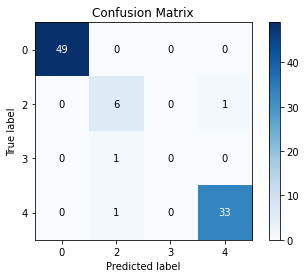

In [53]:
# RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
pred=rfr.predict(x_test)
r2=r2_score(y_test, pred)
error=mean_squared_error(y_test,pred)
scr=cross_val_score(rfr,x,y_mw,cv=10)
print("-------RandomForestRegressor for capacity MW----------")
print(f"r2 score:{r2*100:.2f}")
print(f'cross validation score:{scr.mean()*100:.2f}%\n')
print(f'error:{error}')

# RandomForest Classifier model
rfc=RandomForestClassifier()
rfc.fit(train_x,train_y)
pred_=rfc.predict(test_x)
accu=accuracy_score(test_y,pred_)
scr_=cross_val_score(rfc,x,y_fuel,cv=10)
print("\n\n-------RandomForest Classifierfor Fuel Type------------")
print(f'\naccuracy score:{accuracy_score(test_y,pred_)*100:.2f}%\n')
print(f'cross validation score:{scr_.mean()*100:.2f}%\n')
print(f'\nclassification report:\n\n{classification_report(test_y,pred_)}\n')
print(f'\nconfusion report:\n\n{skplot.metrics.plot_confusion_matrix(test_y,pred_)}')
plt.show()

-------AdaBoostRegressor for capacity MW----------
r2 score:79.49
cross validation score:79.79%

error:0.2252746602229369


-------AdaBoost Classifier for Fuel Type------------

accuracy score:92.31%

cross validation score:84.80%

classification report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           2       0.00      0.00      0.00         7
           3       1.00      1.00      1.00         1
           4       0.83      1.00      0.91        34

    accuracy                           0.92        91
   macro avg       0.71      0.75      0.73        91
weighted avg       0.86      0.92      0.89        91



confusion report:

AxesSubplot(0.125,0.125;0.62x0.755)


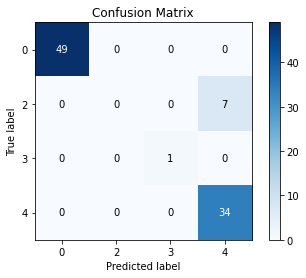

In [54]:
# AdaBoostRegressor
abr=AdaBoostRegressor()
abr.fit(x_train,y_train)
pred=abr.predict(x_test)
r2=r2_score(y_test, pred)
error=mean_squared_error(y_test,pred)
scr=cross_val_score(abr,x,y_mw,cv=10)
print("-------AdaBoostRegressor for capacity MW----------")
print(f"r2 score:{r2*100:.2f}")
print(f'cross validation score:{scr.mean()*100:.2f}%\n')
print(f'error:{error}')

# AdaBoost Classifier model
abc=AdaBoostClassifier()
abc.fit(train_x,train_y)
pred_=abc.predict(test_x)
accu=accuracy_score(test_y,pred_)
scr_=cross_val_score(abc,x,y_fuel,cv=10)
print("\n\n-------AdaBoost Classifier for Fuel Type------------")
print(f'\naccuracy score:{accuracy_score(test_y,pred_)*100:.2f}%\n')
print(f'cross validation score:{scr_.mean()*100:.2f}%')
print(f'\nclassification report:\n\n{classification_report(test_y,pred_)}\n')
print(f'\nconfusion report:\n\n{skplot.metrics.plot_confusion_matrix(test_y,pred_)}')
plt.show()

In [55]:
 from sklearn.linear_model import Lasso,Ridge,LassoCV,RidgeCV

In [56]:
lassocv=LassoCV(alphas=None,max_iter=1000,normalize=True)
lassocv.fit(x_train,y_train)

alpha=lassocv.alpha_
print('lasso best alpha',alpha,'\n')

lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)
pred=lasso_reg.predict(x_test)
r2=r2_score(y_test, pred)
error=mean_squared_error(y_test,pred)
scr=cross_val_score(lasso_reg,x,y_mw,cv=10)
print("-------LassoRegressor for capacity MW----------")
print(f"r2 score:{r2*100:.2f}")
print(f'cross validation score:{scr.mean()*100:.2f}%\n')
print(f'error:{error}')

lasso best alpha 0.0015639651779199059 

-------LassoRegressor for capacity MW----------
r2 score:83.47
cross validation score:65.23%

error:0.18160550891232577


In [57]:
ridcv=RidgeCV(alphas=np.arange(0.001,0.1,0.01),normalize=True)
ridcv.fit(x_train,y_train)

alpha=ridcv.alpha_
print('ridge best alpha',alpha,'\n')

rid_reg=Ridge(alpha)
rid_reg.fit(x_train,y_train)
pred=rid_reg.predict(x_test)
r2=r2_score(y_test, pred)
error=mean_squared_error(y_test,pred)
scr=cross_val_score(rid_reg,x,y_mw,cv=10)
print("-------reidgeRegressor for capacity MW----------")
print(f"r2 score:{r2*100:.2f}")
print(f'cross validation score:{scr.mean()*100:.2f}%\n')
print(f'error:{error}')

ridge best alpha 0.09099999999999998 

-------reidgeRegressor for capacity MW----------
r2 score:83.56
cross validation score:65.09%

error:0.18061895365257


In [58]:
#ABR
from sklearn.model_selection import GridSearchCV

parameters={'n_estimators': [50, 100],'learning_rate':[0.01,0.05,0.1,0.3,1],'loss':['linear','square','exponential']}

clf=GridSearchCV(abr,parameters)
clf.fit(x_train,y_train)
print('best parameters',clf.best_params_)

abr_new=clf.best_estimator_
abr_new.fit(x_train,y_train)
pred=abr_new.predict(x_test)
r2=r2_score(y_test, pred)
error=mean_squared_error(y_test,pred)
scr=cross_val_score(abr_new,x,y_mw,cv=10)
print("\n-------AdaBoostRegressor Hyperparameter tuning for capacity MW----------")
print(f"r2 score:{r2*100:.2f}")
print(f'cross validation score:{scr.mean()*100:.2f}%\n')
print(f'error:{error}')

best parameters {'learning_rate': 0.3, 'loss': 'linear', 'n_estimators': 50}

-------AdaBoostRegressor Hyperparameter tuning for capacity MW----------
r2 score:80.64
cross validation score:79.34%

error:0.21268523232763709


best parameters {'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'uniform'}


-------KNeighbors Classifier Hyperparameter tuning for Fuel Type------------

accuracy score:93.41%

cross validation score:93.37%


classification report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           2       0.57      0.57      0.57         7
           3       0.00      0.00      0.00         1
           4       0.91      0.94      0.93        34

    accuracy                           0.93        91
   macro avg       0.62      0.63      0.62        91
weighted avg       0.92      0.93      0.93        91



confusion report:

AxesSubplot(0.125,0.125;0.62x0.755)


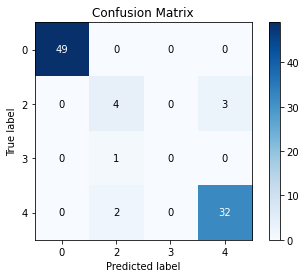

In [59]:
#KNC
from sklearn.model_selection import GridSearchCV

parameters={ 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
clf=GridSearchCV(knc,parameters)
clf.fit(train_x,train_y)
print('best parameters',clf.best_params_)

knc_new=clf.best_estimator_
knc_new.fit(train_x,train_y)
pred_=knc_new.predict(test_x)
accu=accuracy_score(test_y,pred_)
scr_=cross_val_score(knc_new,x,y_fuel,cv=10)
print("\n\n-------KNeighbors Classifier Hyperparameter tuning for Fuel Type------------")
print(f'\naccuracy score:{accuracy_score(test_y,pred_)*100:.2f}%\n')
print(f'cross validation score:{scr_.mean()*100:.2f}%\n')
print(f'\nclassification report:\n\n{classification_report(test_y,pred_)}\n')
print(f'\nconfusion report:\n\n{skplot.metrics.plot_confusion_matrix(test_y,pred_)}')
plt.show()

In [60]:
import pickle
filename='data_predict.pkl'
pickle.dump([knc_new],open(filename,'wb'))
pickle.dump([abr_new],open(filename,'wb'))